<a href="https://colab.research.google.com/github/DhaniAAA/Scrapping-Ulasan/blob/main/Teks_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd

In [7]:
!pip install sastrawi emoji deep_translator langdetect

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')  # Download data yang diperlukan untuk tokenisasi
nltk.download('punkt_tab') # This line is crucial to fix the error
#stemmer = PorterStemmer()
#lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi penghapus stopwords
stopword_factory = StopWordRemoverFactory()
stopwords = set(stopword_factory.get_stop_words())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import csv
import emoji

# File input dan output
input_file = '/content/Data Merge - Date-user-tweet.csv'
output_file = '/content/Dataset Convert Emoji.csv'

# Baca file dan konversi emoji di kolom 'tweet'
with open(input_file, mode='r', encoding='utf-8') as infile, \
     open(output_file, mode='w', newline='', encoding='utf-8') as outfile:

    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames  # Ambil semua nama kolom
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    writer.writeheader()

    for row in reader:
        if 'tweet' in row and row['tweet'].strip() != '':
            # Konversi emoji
            row['tweet'] = emoji.demojize(row['tweet'], language='id')
        writer.writerow(row)  # Tulis baris yang telah dimodifikasi

print(f"Proses selesai! File yang diperbarui disimpan sebagai '{output_file}'.")


Proses selesai! File yang diperbarui disimpan sebagai '/content/Dataset Convert Emoji.csv'.


In [ ]:
df=pd.read_csv("/content/Data Merge - Date-user-tweet.csv")
df.head(160)

,username,created_at,tweet
0,TxtdariHI,Fri Feb 21 09:06:15 +0000 2025,#IndonesiaGelap Goes Global https://t.co/fHtwi...
1,ccmbxt,Sat Feb 22 18:03:03 +0000 2025,#IndonesiaGelap #ArtistBersuara https://t.co/3...
2,cilokmediumrare,Sat Feb 22 10:52:45 +0000 2025,#IndonesiaGelap #IndonesiaGelap2025 #ArtistBe...
3,BBCIndonesia,Mon Feb 17 12:14:32 +0000 2025,Kumpulan foto-foto aksi #IndonesiaGelap di Jak...
4,__AnakKolong,Sat Feb 22 13:07:59 +0000 2025,#IndonesiaGelap https://t.co/4SV4gssKO1
...,...,...,...
155,MARQUEZ__93,Fri Feb 21 14:11:42 +0000 2025,Demo Indonesia Gelap Mahasiswa Hingga Malam In...
156,Ndrewstjan,Wed Feb 26 18:37:44 +0000 2025,Barusan dapat informasi soal kondisi jepang. T...
157,Y_Radianto,Wed Feb 26 12:08:00 +0000 2025,Budi Arie kesayangan Mulyono nyata sekali bahw...
158,BBCIndonesia,Mon Feb 17 12:14:35 +0000 2025,Menurut BEM Universitas Indonesia aksi #Indone...


In [ ]:
#Cleaning Data
import pandas as pd
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Baca dataset
df = pd.read_csv('/content/Dataset Convert Emoji.csv')

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', ' ', text)
    text = re.sub(r"@\w+|#", ' ', text)                   # Hapus mention dan hashtag
    text = re.sub(r"\d+", ' ', text)                      # Hapus angka
    text = re.sub(r"[^\w\s]", ' ', text)                  # Hapus tanda baca
    text = re.sub(r"\s+", ' ', text)                     # Hapus spasi berlebih
    text = re.sub(r"_", ' ', text)
    text = re.sub(r":", ' ', text)
    return text

# Bersihkan kolom tweet
df['tweet'] = df['tweet'].apply(clean_text)

# Hapus baris yang mengandung bahasa Inggris
def is_not_english(text):
    try:
        return detect(text) != 'en'  # True jika bukan bahasa Inggris
    except LangDetectException:
        return False
df = df[df['tweet'].apply(is_not_english)]

# Hapus duplikat berdasarkan teks tweet yang sudah dibersihkan
df = df.drop_duplicates(subset='tweet', keep='first')

# Simpan hasil
df.to_csv('/content/Data_Cleaned.csv', index=False, encoding='utf-8-sig')

print("Cleaning selesai! Data hanya berisi tweet non-Inggris. Disimpan sebagai 'Data_Cleaned_No_English.csv'.")


Cleaning selesai! Data hanya berisi tweet non-Inggris. Disimpan sebagai 'Data_Cleaned_No_English.csv'.


In [8]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('/content/Data_CleanedV2.csv')

# Hapus baris yang mengandung nilai kosong (NaN) di kolom manapun
df = df.dropna()

# Cek jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus baris kosong: {len(df)}")

# Cek baris yang duplikat berdasarkan semua kolom
duplikat = df[df.duplicated()]

# Cek baris yang duplikat berdasarkan kolom 'tweet' saja
duplikat_tweet = df[df.duplicated(subset='tweet')]

# Tampilkan data yang duplikat (jika ada)
print("\nDuplikat berdasarkan kolom 'tweet':")
print(duplikat_tweet)

print("\nDuplikat berdasarkan semua kolom:")
print(duplikat)

# Simpan hasil yang sudah dibersihkan dan tanpa duplikat
df_cleaned = df.drop_duplicates(subset='tweet', keep='first')
df_cleaned.to_csv('/content/Data_Cleaned_Final.csv', index=False, encoding='utf-8-sig')
print("\nData akhir disimpan ke 'Data_Cleaned_Final.csv'")


Jumlah data setelah menghapus baris kosong: 2547

Duplikat berdasarkan kolom 'tweet':
             username                      created_at  \
459   chilialouloudia  Wed Feb 05 13:39:47 +0000 2025   
470           sedctiv  Fri Feb 07 05:30:10 +0000 2025   
493    coquettegurlll  Tue Feb 04 03:24:29 +0000 2025   
500       Sapta_Combo  Tue Feb 04 02:47:53 +0000 2025   
574   CybrsynBeatrice  Tue Feb 04 02:43:47 +0000 2025   
602           nginrpj  Tue Feb 04 00:34:23 +0000 2025   
663          Fabio7dc  Sat Feb 08 04:50:33 +0000 2025   
1185    c4relesshands  Fri Feb 21 10:40:58 +0000 2025   
1259  FikriTheAdviser  Tue Feb 11 08:13:36 +0000 2025   
1375          SIMJKYZ  Tue Feb 18 12:12:17 +0000 2025   
1519          VOAThai  Fri Feb 21 15:19:02 +0000 2025   
1574  IndonesiaGelap2  Thu Feb 20 05:58:07 +0000 2025   
2074      MINERBA_4th  Sun Feb 16 09:45:43 +0000 2025   
2280     masn17798065  Tue Feb 18 16:29:48 +0000 2025   
2314         ktwraya_  Thu Feb 20 17:24:27 +0000 2025   
24

In [11]:
print("Jumlah nilai kosong per kolom:")
print(df.isna().sum())


Jumlah nilai kosong per kolom:
username      0
created_at    0
tweet         0
dtype: int64


In [ ]:
# Cek jumlah duplikat pada kolom 'tweet' (asli)
duplicate_count = df['tweet'].duplicated().sum()
print(f"Jumlah duplikat pada kolom 'tweet': {duplicate_count}")

# Jika ingin menampilkan data yang duplikat saja:
duplicates = df[df['tweet'].duplicated(keep=False)]
print("\nContoh data duplikat:")
print(duplicates.head())


Jumlah duplikat pada kolom 'tweet': 16

Contoh data duplikat:
            username                      created_at                 tweet
4       __AnakKolong  Sat Feb 22 13:07:59 +0000 2025        indonesiagelap
246        cobeh2022  Sat Feb 22 06:38:37 +0000 2025       indonesia gelap
424       diptherium  Tue Feb 04 00:25:38 +0000 2025  tuju indonesia gelap
459  chilialouloudia  Wed Feb 05 13:39:47 +0000 2025       indonesia gelap
470          sedctiv  Fri Feb 07 05:30:10 +0000 2025  tuju indonesia gelap


In [ ]:
import emoji
import pandas as pd

# Load data
#file_path = '/content/komentar.csv'
#comments_df = pd.read_csv(file_path)

# Fungsi untuk mengubah emoji ke teks
def emoji_to_text(text):
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary
    return emoji.demojize(text, language='id')
# Terapkan fungsi ke kolom 'comments'
df['Content'] = df['full_text'].apply(emoji_to_text)

# Save to a new CSV file
output_path = '/content/komentar_translated.csv'
df.to_csv(output_path, index=False)

In [ ]:
df2 = pd.read_csv("/content/komentar_translated.csv")
df2

,uniqueId,text
0,ntaanetaa1,ini bener aku 18 dpt 12 apa 1 bungkus
1,voyycruchy2,aku dapet 24 ribu kakk
2,senyumin.aja28,aku dapet 20k kak😁
3,aprianti2014,aku dapet 19k😱😱
4,nna21936,terimakasih kakak
5,woo_seok08,menangis 45k 😭😭
6,ema.yati40,back😁
7,maznajazila,aku dapet harga 25
8,z_ukaa2,10 rb


In [ ]:
from langdetect import detect
import pandas as pd

# Membaca data dari CSV
df = pd.read_csv('/content/Data_Cleaned.csv')

# Fungsi untuk mendeteksi bahasa
def detect_language(text):
    try:
        return detect(str(text))  # Deteksi bahasa
    except:
        return "unknown"  # Jika gagal deteksi, tandai sebagai "unknown"

# Tambahkan kolom baru dengan hasil deteksi bahasa
df['detected_lang'] = df['tweet'].apply(detect_language)

# Tampilkan jumlah baris berbahasa Inggris sebelum dihapus
english_rows = df[df['detected_lang'] == 'en']
print(f"Ditemukan {len(english_rows)} baris berbahasa Inggris.")
print(english_rows[['tweet', 'detected_lang']].head())

# Hapus baris yang berbahasa Inggris
df = df[df['detected_lang'] != 'en']

# (Opsional) Hapus juga kolom 'detected_lang' jika tidak dibutuhkan
df = df.drop(columns=['detected_lang'])

# Simpan hasil akhir ke file baru
df.to_csv('/content/cleaned_tweets_filtered.csv', index=False)
print(f"File disimpan sebagai 'cleaned_tweets_filtered.csv' dengan {df.shape[0]} baris.")


Ditemukan 8 baris berbahasa Inggris.
                                                  tweet detected_lang
256   INDONESIA GELAP MARI BERSOLIDARITAS https://t....            en
1329                        Efisienshit #IndonesiaGelap            en
1660               @worchestersire Indonesia gelap 2045            en
2425  Substansi UU Minerba. Sumber: @GreenpeaceID ht...            en
2470  good high school EXH S-PUC️️️️️️️️️️ SDVX 1st ...            en
File disimpan sebagai 'cleaned_tweets_filtered.csv' dengan 3262 baris.


In [ ]:
#Only Cleaning,case folding, emoji, translator.
import re
import emoji
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Fungsi untuk membersihkan teks dan menerjemahkan jika diperlukan
def clean_tweet(text):
    text = str(text)  # Pastikan teks dalam format string
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', '', text)  # Hapus URL, mention, angka, hashtag

    # Ubah emoji menjadi teks deskripsi
    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    # Cek apakah teks dominan berbahasa Inggris sebelum diterjemahkan
    try:
        if detect(text) == 'en':
            text = GoogleTranslator(source='en', target='id').translate(text)
    except:
        pass  # Jika gagal deteksi, biarkan tetap seperti aslinya

    # Menghapus karakter khusus kecuali huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Mengonversi ke huruf kecil dan menghapus spasi berlebih
    return text.lower().strip()

# Membaca data dari CSV
df = pd.read_csv('/content/Data Merge - Date-user-tweet.csv')

# Membersihkan teks di kolom 'full_text' dan menerjemahkan jika perlu
df['clean_text'] = df['tweet'].astype(str).apply(clean_tweet)

# Menghapus baris duplikat (hanya menyimpan yang pertama)
df = df.drop_duplicates(keep='first')

# Menghapus baris yang masih mengandung bahasa Inggris setelah translasi
def is_english(text):
    try:
        return detect(text) == 'en'  # Jika masih bahasa Inggris, True
    except:
        return False  # Jika gagal deteksi, anggap bukan bahasa Inggris

df = df[~df['clean_text'].apply(is_english)]  # Hapus baris yang masih berbahasa Inggris

# Menghapus baris yang memiliki nilai kosong
df = df.dropna()

# Menyimpan hasil ke file baru
df.to_csv('cleaned_tweets.csv', index=False)

print(f"Pembersihan selesai. Dataset akhir: {df.shape[0]} baris, {df.shape[1]} kolom.")
print("File disimpan sebagai 'cleaned_tweets.csv'.")


Pembersihan selesai. Dataset akhir: 2777 baris, 4 kolom.
File disimpan sebagai 'cleaned_tweets.csv'.


In [ ]:
#Full
import re
import emoji
import pandas as pd
import nltk
from langdetect import detect
from deep_translator import GoogleTranslator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords

nltk.download('punkt')

# Inisialisasi tools
stemmer = StemmerFactory().create_stemmer()
stopword_factory = StopWordRemoverFactory()
stopwords_id = set(stopword_factory.get_stop_words())
translator = GoogleTranslator(source='en', target='id')

# Fungsi membersihkan dan menerjemahkan teks
def clean_and_translate(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ""  # Jika bukan string, kembalikan teks kosong

    text = re.sub(r"http\S+|www\S+|@\w+|\d+|#", "", text)
    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    try:
        if detect(text) == 'en':
            text = translator.translate(text)
    except:
        pass

    text = re.sub(r"[^a-zA-Z\s]", "", text).lower().strip()
    return text

# Fungsi untuk tokenizing, stopword removal, dan stemming
def tokenize_stem_stopwords(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ""
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords_id]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

# === Proses utama ===
df = pd.read_csv('/content/Data Merge - Date-user-tweet.csv')

# Pastikan kolom 'tweet' tidak kosong
df = df[df['tweet'].notnull()]

# Bersihkan dan terjemahkan teks
df['clean_text'] = df['tweet'].astype(str).apply(clean_and_translate)

# Tokenizing + stemming + stopword removal
df['clean_text'] = df['clean_text'].apply(tokenize_stem_stopwords)

# Hapus duplikat dan nilai kosong
df = df.drop_duplicates(subset='clean_text', keep='first')
df = df.dropna(subset=['clean_text'])

# Simpan ke file
df.to_csv('cleaned_tweets.csv', index=False)

print(f"✅ Selesai! Dataset akhir: {df.shape[0]} baris, {df.shape[1]} kolom.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Selesai! Dataset akhir: 2590 baris, 4 kolom.


In [ ]:
import emoji
import nltk
from nltk.tokenize import word_tokenize
def preprocess_text_stemming(text):
    print("Original text:", text)
    text = str(text)
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', ' ', text)

    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    # Menghapus karakter selain huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    print("Cleaning Data:", text)

    # Konversi ke huruf kecil
    text = text.lower()
    print("Lowercase:", text)

    # Tokenisasi teks
    words = nltk.word_tokenize(text)
    print("Tokenized words:", words)

    # Menghapus stopwords menggunakan daftar Sastrawi
    words = [word for word in words if word not in stopwords]
    print("Stopwords removed:", words)

    # Stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    print("Stemmed words:", stemmed_words)

    # Gabungkan kembali menjadi satu string
    final_text = ' '.join(stemmed_words)
    print("Final processed text:", final_text)

    return final_text

# Contoh penggunaan
contoh_teks = "Aksi masa aliansi mahasiswa dan rakyat sipil di kota Bengkulu BUMI RAFLESIA MELAWAN Kembali memakan korban dari Represifitas Aparat dalam aksi #indonesiagelap Terdata ada 31 orang yang menjadi korban dari kekerasan oknum kepolisian. https://t.co/ut1cg6Qhsx"
hasil = preprocess_text_stemming(contoh_teks)

Original text: Aksi masa aliansi mahasiswa dan rakyat sipil di kota Bengkulu BUMI RAFLESIA MELAWAN Kembali memakan korban dari Represifitas Aparat dalam aksi #indonesiagelap Terdata ada 31 orang yang menjadi korban dari kekerasan oknum kepolisian. https://t.co/ut1cg6Qhsx
Cleaning Data: Aksi masa aliansi mahasiswa dan rakyat sipil di kota Bengkulu BUMI RAFLESIA MELAWAN Kembali memakan korban dari Represifitas Aparat dalam aksi  indonesiagelap Terdata ada   orang yang menjadi korban dari kekerasan oknum kepolisian   
Lowercase: aksi masa aliansi mahasiswa dan rakyat sipil di kota bengkulu bumi raflesia melawan kembali memakan korban dari represifitas aparat dalam aksi  indonesiagelap terdata ada   orang yang menjadi korban dari kekerasan oknum kepolisian   
Tokenized words: ['aksi', 'masa', 'aliansi', 'mahasiswa', 'dan', 'rakyat', 'sipil', 'di', 'kota', 'bengkulu', 'bumi', 'raflesia', 'melawan', 'kembali', 'memakan', 'korban', 'dari', 'represifitas', 'aparat', 'dalam', 'aksi', 'indonesia

In [50]:
LEXICON_FILE_PATH = '/content/modified-lexicon_text.txt'

# Load lexicon from file
def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            word, score = line.strip().split(',')
            lexicon[word] = int(score)
    return lexicon

# Tokenize input text
def tokenize(text):
    return text.lower().split()

# Calculate sentiment score
def calculate_sentiment(text, lexicon):
    words = tokenize(text)
    sentiment_score = 0
    for word in words:
        if word in lexicon:
            sentiment_score += lexicon[word]
    return sentiment_score

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 0:
        return "Positif"
    elif score < -0:
        return "Negatif"
    else:
        return "Netral"

# Main function for sentiment analysis
def sentiment_analysis(text):
    lexicon = load_lexicon(LEXICON_FILE_PATH)
    score = calculate_sentiment(text, lexicon)
    sentiment = classify_sentiment(score)
    return sentiment, score

# Example usage
df = pd.read_csv("/content/Data_Cleaned_Final.csv")

# Assuming there's a column named 'text' containing the text data
df['Sentiment'], df['Score'] = zip(*df['tweet'].apply(sentiment_analysis))
df.to_csv('/content/Hasil_Sentiment_Analysis.csv', index=False, encoding='utf-8-sig')

# Print results
print(df[['tweet', 'Sentiment', 'Score']])

                                                  tweet Sentiment  Score
0                            indonesiagelap goes global    Netral      0
1                         indonesiagelap artistbersuara    Netral      0
2          indonesiagelap indonesiagelap artistbersuara    Netral      0
3     kumpul foto foto aksi indonesiagelap jakarta s...   Negatif    -12
4                                        indonesiagelap    Netral      0
...                                                 ...       ...    ...
2526  sibuk tengah panik tadi bagaimana usaha tenang...   Negatif    -35
2527  bahaya langit kian kelabu mendung gantung bera...   Negatif    -34
2528  otensi cuaca ekstrem mulai siang sampai minggu...   Negatif    -33
2529  orang orang lari cari lindung tunduk kepala ba...   Negatif    -27
2530  jahat sekali dalang yg aneh muncul utk redam k...   Negatif    -46

[2531 rows x 3 columns]


In [52]:
df.to_csv('/content/Hasil_Sentiment_Analysis.csv', index=False, encoding='utf-8-sig')

In [53]:
df=pd.read_csv("/content/Hasil_Sentiment_Analysis.csv")
df

,username,created_at,tweet,Sentiment,Score
0,TxtdariHI,Fri Feb 21 09:06:15 +0000 2025,indonesiagelap goes global,Netral,0
1,ccmbxt,Sat Feb 22 18:03:03 +0000 2025,indonesiagelap artistbersuara,Netral,0
2,cilokmediumrare,Sat Feb 22 10:52:45 +0000 2025,indonesiagelap indonesiagelap artistbersuara,Netral,0
3,BBCIndonesia,Mon Feb 17 12:14:32 +0000 2025,kumpul foto foto aksi indonesiagelap jakarta s...,Negatif,-12
4,__AnakKolong,Sat Feb 22 13:07:59 +0000 2025,indonesiagelap,Netral,0
...,...,...,...,...,...
2526,ishyarat,Sun Feb 23 16:59:35 +0000 2025,sibuk tengah panik tadi bagaimana usaha tenang...,Negatif,-35
2527,ishyarat,Sun Feb 23 16:29:50 +0000 2025,bahaya langit kian kelabu mendung gantung bera...,Negatif,-34
2528,A_BLogWeb,Mon Feb 24 07:00:24 +0000 2025,otensi cuaca ekstrem mulai siang sampai minggu...,Negatif,-33
2529,pancagtra,Thu Feb 27 09:40:33 +0000 2025,orang orang lari cari lindung tunduk kepala ba...,Negatif,-27


<ipython-input-54-3c494e7d5e0b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


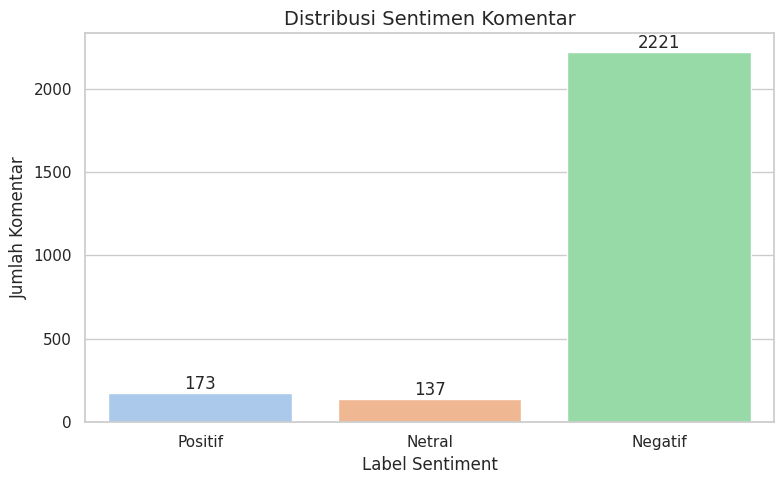

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data yang sudah dilabeli
#df = pd.read_csv('/content/Data_Labeled.csv')

# Atur gaya visualisasi
sns.set(style="whitegrid")

# Hitung jumlah tiap label
label_counts = df['Sentiment'].value_counts().reindex(['Positif', 'Netral', 'Negatif'], fill_value=0)

# Buat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')

# Tambahkan label dan judul
plt.title('Distribusi Sentimen Komentar', fontsize=14)
plt.xlabel('Label Sentiment', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

# Tampilkan angka di atas bar
for i, value in enumerate(label_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# Tampilkan plot
plt.tight_layout()
plt.show()

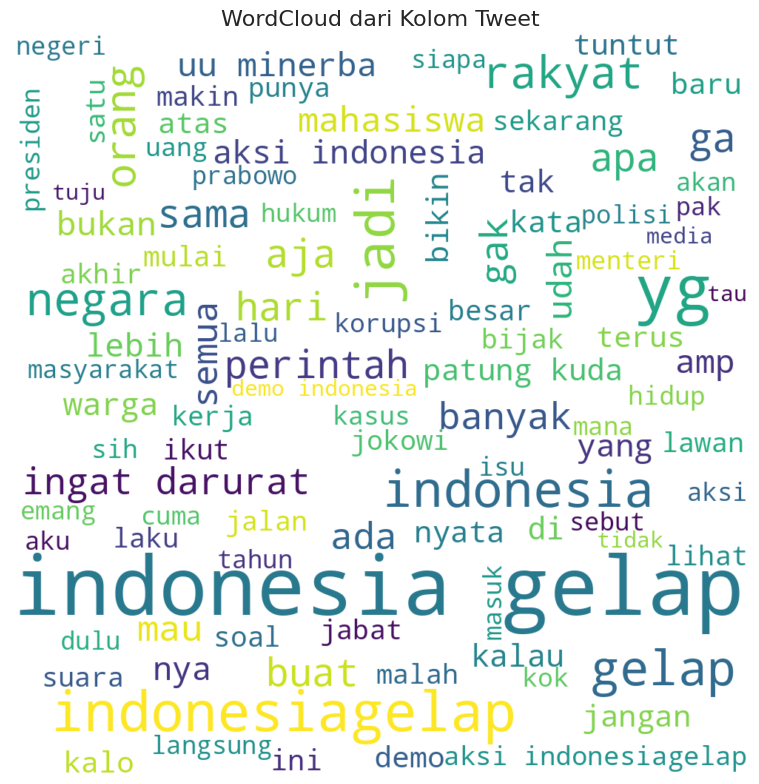

In [64]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baca dataset
#df = pd.read_csv('/content/Data_Cleaned_Final.csv')

# Gabungkan semua teks dalam kolom 'tweet' jadi satu string besar
all_text = ' '.join(df['tweet'].dropna().astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(max_words=100, max_font_size=160, width=1000, height=1000, mode='RGBA', background_color='white', colormap='viridis').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom Tweet', fontsize=16)
plt.tight_layout()
plt.show()


In [105]:
#Dengan Balance Smote
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np

X = df['tweet']
y = df['Sentiment']

# 1. Encode the target variable using LabelEncoder:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2. Create the CountVectorizer and transform the input features:
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# 3. Apply SMOTE to the vectorized features and encoded target:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vec, y_encoded)

# 4. Split the resampled data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 5. Train the Gaussian Naive Bayes classifier:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train.toarray(), y_train) # X_train should be in dense format

# 6. Make predictions and evaluate the model:
y_pred_nb = classifier_nb.predict(X_test.toarray()) # X_test should also be in dense format
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       455
           1       0.56      0.96      0.71       441
           2       0.78      0.23      0.36       437

    accuracy                           0.71      1333
   macro avg       0.76      0.71      0.66      1333
weighted avg       0.76      0.71      0.67      1333



In [104]:
#naive bayes tanpa smote

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the preprocessed data
#df = pd.read_csv('/content/Hasil_Sentiment_Analysis.csv')

# Define features (X) and target (y)
X = df['tweet']
y = df['Sentiment']

# Encode the target variable
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

# Create the CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42
)

# Train the Gaussian Naive Bayes classifier
classifier_nb = GaussianNB()
classifier_nb.fit(X_train.toarray(), y_train)

# Make predictions
y_pred_nb = classifier_nb.predict(X_test.toarray())

# Evaluate the model
print("Naive Bayes Classification Report (without SMOTE):\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report (without SMOTE):
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       446
           1       0.42      0.34      0.38        29
           2       0.25      0.12      0.17        32

    accuracy                           0.87       507
   macro avg       0.53      0.47      0.49       507
weighted avg       0.84      0.87      0.85       507



In [106]:
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

# Optional: Convert to DataFrame for better readability
train_df = pd.DataFrame(X_train_array, columns=vectorizer.get_feature_names_out())
test_df = pd.DataFrame(X_test_array, columns=vectorizer.get_feature_names_out())

print("X_train_vec as array:\n", train_df)
print("\nX_test_vec as array:\n", test_df)

X_train_vec as array:
       aaaaa  aaaaaa  aaaaaaa  aaaaaaaaa  aamiin  abad  abah  abai  abang  \
0         0       0        0          0       0     0     0     0      0   
1         0       0        0          0       0     0     0     0      0   
2         0       0        0          0       0     0     0     0      0   
3         0       0        0          0       0     0     0     0      0   
4         0       0        0          0       0     0     0     0      0   
...     ...     ...      ...        ...     ...   ...   ...   ...    ...   
5325      0       0        0          0       0     0     0     0      0   
5326      0       0        0          0       0     0     0     0      0   
5327      0       0        0          0       0     0     0     0      0   
5328      0       0        0          0       0     0     0     0      0   
5329      0       0        0          0       0     0     0     0      0   

      abangkuu  ...  zolim  zon  zona  zonauang  zonk  zuairina 

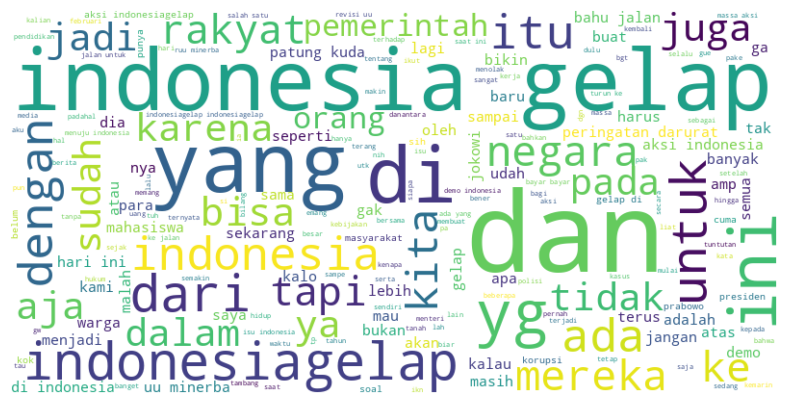

In [ ]:
# prompt: buatkan woldcloud kata yang sering muncul

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dalam kolom 'Content'
text = " ".join(df['clean_text'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
incorrect_indices = np.where(y_pred_nb != y_test)[0]

In [ ]:
incorrect_indices_knn = np.where(y_pred_knn != y_test)[0]
print("\nIncorrect KNN Predictions:")
for i in incorrect_indices_knn[:2]:
    print("Predicted: >", y_pred_knn[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_dt = np.where(y_pred_dt != y_test)[0]
print("\nIncorrect DT Predictions:")
for i in incorrect_indices_dt[:2]:
    print("Predicted: >", y_pred_dt[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_nb = np.where(y_pred_nb != y_test)[0]
print("\nIncorrect NB Predictions:")
for i in incorrect_indices_nb[:2]:
    print("Predicted: >", y_pred_nb[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

In [ ]:
# Cleaning Data + Tokenizing + Stopword Removal + Stemming

import pandas as pd
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from nltk.tokenize import word_tokenize
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download NLTK resources
nltk.download('punkt')

# Baca dataset
df = pd.read_csv('/content/Dataset Convert Emoji.csv')

# Inisialisasi stopword remover dan stemmer
factory_stopwords = StopWordRemoverFactory()
stopword = factory_stopwords.create_stop_word_remover()

factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', ' ', text)
    text = re.sub(r"@\w+|#", ' ', text)
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"[^\w\s]", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    text = re.sub(r"_", ' ', text)
    text = re.sub(r":", ' ', text)
    return text.lower()

# Bersihkan kolom tweet
df['tweet'] = df['tweet'].apply(clean_text)

# Hapus baris yang mengandung bahasa Inggris
def is_not_english(text):
    try:
        return detect(text) != 'en'
    except LangDetectException:
        return False
df = df[df['tweet'].apply(is_not_english)]

# Hapus baris dengan nilai kosong (NaN)
df = df.dropna()
# Hapus duplikat berdasarkan teks tweet yang sudah dibersihkan
df = df.drop_duplicates(subset='tweet', keep='first')

# Fungsi tokenizing, stopword removal, dan stemming
def preprocess_text(text):
    # Tokenizing
    tokens = word_tokenize(text)
    # Gabungkan kembali setelah stopword removal
    filtered_text = ' '.join(tokens)
    filtered_text = stopword.remove(filtered_text)
    # Stemming
    stemmed_text = stemmer.stem(filtered_text)
    return stemmed_text

# Terapkan preprocessing
df['tweet'] = df['tweet'].apply(preprocess_text)

# Simpan hasil
df.to_csv('/content/Data_Cleaned.csv', index=False, encoding='utf-8-sig')

print("Cleaning selesai! Data hanya berisi tweet non-Inggris dengan tokenizing, stopword removal, dan stemming. Disimpan sebagai 'Data_Cleaned.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaning selesai! Data hanya berisi tweet non-Inggris dengan tokenizing, stopword removal, dan stemming. Disimpan sebagai 'Data_Cleaned.csv'.
